<a href="https://colab.research.google.com/github/Snaiyer1/MAT_421/blob/main/ModuleG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Numerical Integration Problem Statement

Given f(x), we want to approximate the integarl of f(x) over [a,b]. To accomplish this, we assume that the interval has been discretized into a numerical grid, x, which consists of n+1 points with, h = (b-a)/(n) as the spacing. Each point in x is denoted as xi, where x0 = a and xn = b. We have n+1 grid points because the count starts at x0. We are also assuming that we have a function that can be computer for an of the grid points. We can also assume that we are given the function implicity as f(xi) and the interval [xi, xi+1], which is the subinterval.


###Reimann's Integral
Numerical integration is a technique for approximating definite integrals when analytical solutions are difficult or impossible to find. When we want to approximate the integral, we divide the interval into smaller subintervals and approximate the area under the curve.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

a = 0
b = np.pi

true_value = 2

The Riemann method divides the interval [a,b] into n subintervals and approximates the area using rectangles. The height of each rectangle is determined by the function value at either


*   Left endpoint/Left Riemann Sum
*   Right endpoint/Right Riemann Sum

For each subinterval from x₁ to x₁₊₁ with width h, we calculate: h × f(x₁) - Left Reimann - and h × f(x₁₊₁) - Right Reimann.

The total integral approximation is ∫ₐᵇf(x)dx ≈ ∑ᵢ₌₀ⁿ⁻¹ h × f(xᵢ) (Left) and ∫ₐᵇf(x)dx ≈ ∑ᵢ₌₁ⁿ h × f(xᵢ) (Right).

In [2]:
n = 10
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
y = f(x)

I_left = h * sum(y[:n-1])
error_left = abs(true_value - I_left)
print(f"Left Riemann Sum: {I_left:.10f}, Error: {error_left:.10f}")

I_right = h * sum(y[1:])
error_right = abs(true_value - I_right)
print(f"Right Riemann Sum: {I_right:.10f}, Error: {error_right:.10f}")

Left Riemann Sum: 1.9796508112, Error: 0.0203491888
Right Riemann Sum: 1.9796508112, Error: 0.0203491888


Instead of using the endpoint values, the Midpoint Rule uses the function value at the middle of each subinterval. For each subinterval, we can calculate yᵢ = (xᵢ₊₁ + xᵢ)/2 and the approximation becomes ∫ₐᵇf(x)dx ≈ ∑ᵢ₌₀ⁿ⁻¹ h × f(yᵢ)

We can also use Taylor series to analyze the error for each of the methods. For the Reimann Integral, the error for a single subinterval is O(h²). The total error over the whole interval is O(h). For the Midpoint Rule, the error for a single subinterval is O(h³) and the total error is O(h²).

This means the Midpoint Rule is more accurate by one order of magnitude as compared to the Riemann method, despite them have the same number of caculations.

In [3]:
midpoints = (x[:n-1] + x[1:]) / 2
y_mid = f(midpoints)
I_mid = h * sum(y_mid)
error_mid = abs(true_value - I_mid)
print(f"Midpoint Rule: {I_mid:.10f}, Error: {error_mid:.10f}")

Midpoint Rule: 2.0101901160, Error: 0.0101901160


To better understand these methods, lets visualize them with a smaller number of subintervals:

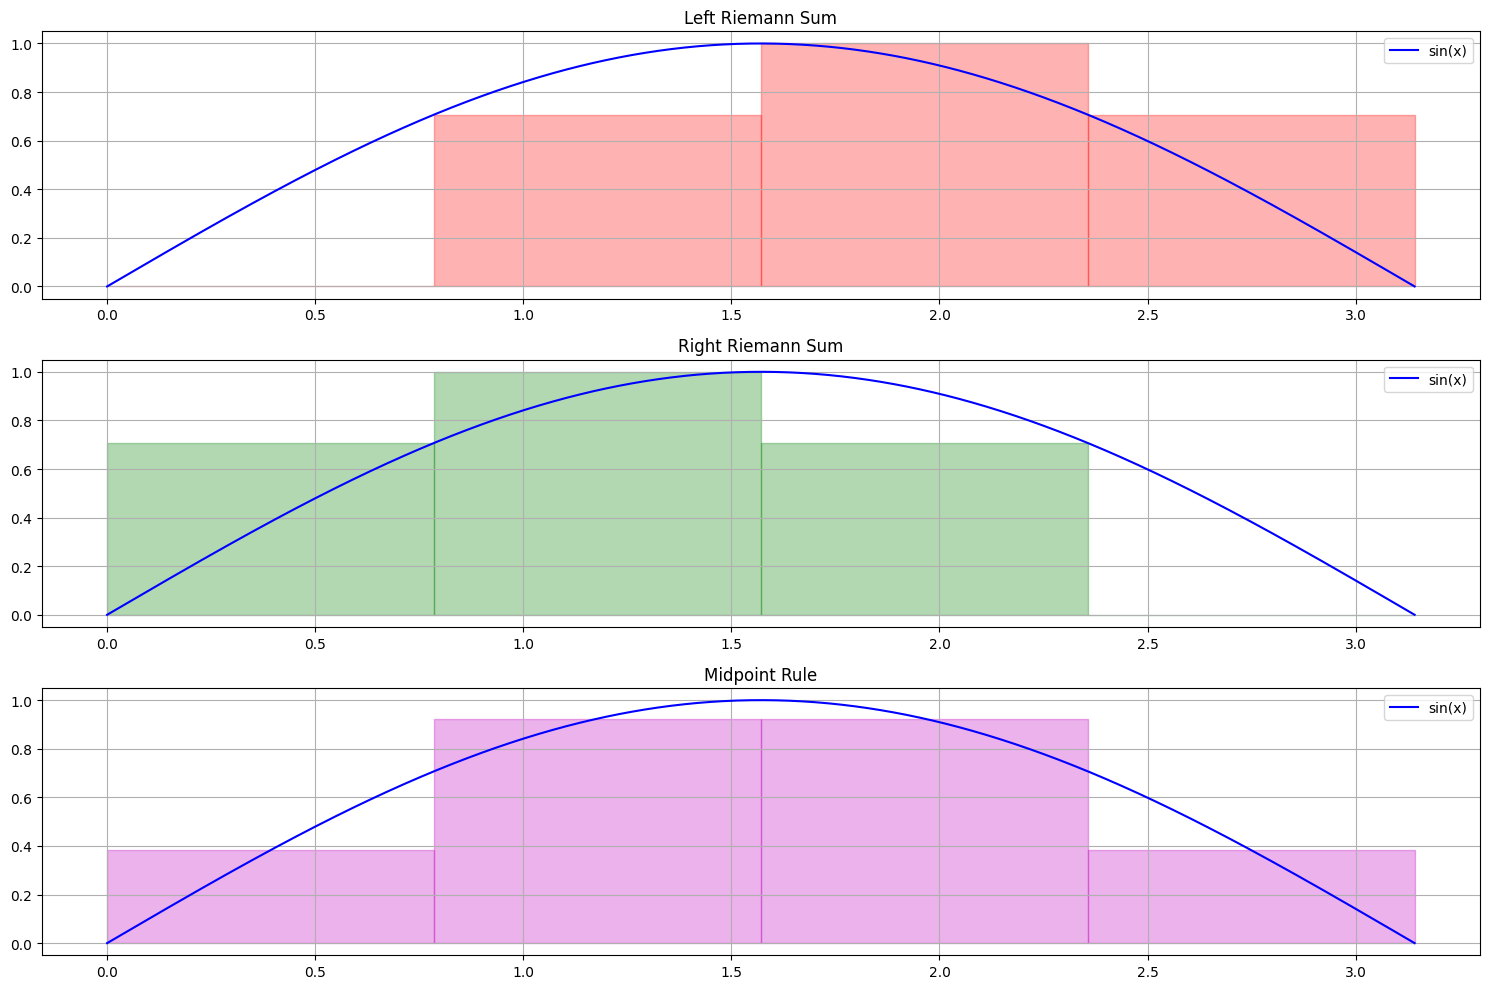

In [4]:
n_demo = 5
h_demo = (b - a) / (n_demo - 1)
x_demo = np.linspace(a, b, n_demo)
y_demo = f(x_demo)

x_fine = np.linspace(a, b, 1000)
y_fine = f(x_fine)

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(x_fine, y_fine, 'b-', label='sin(x)')
for i in range(n_demo-1):
    plt.fill_between([x_demo[i], x_demo[i+1]], 0, y_demo[i], alpha=0.3, color='r')
plt.title('Left Riemann Sum')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(x_fine, y_fine, 'b-', label='sin(x)')
for i in range(n_demo-1):
    plt.fill_between([x_demo[i], x_demo[i+1]], 0, y_demo[i+1], alpha=0.3, color='g')
plt.title('Right Riemann Sum')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(x_fine, y_fine, 'b-', label='sin(x)')
midpoints_demo = (x_demo[:n_demo-1] + x_demo[1:]) / 2
y_mid_demo = f(midpoints_demo)
for i in range(n_demo-1):
    plt.fill_between([x_demo[i], x_demo[i+1]], 0, y_mid_demo[i], alpha=0.3, color='m')
plt.title('Midpoint Rule')
plt.grid(True)
plt.legend()

plt.tight_layout()

Lets compare the errors for the different methods as well:

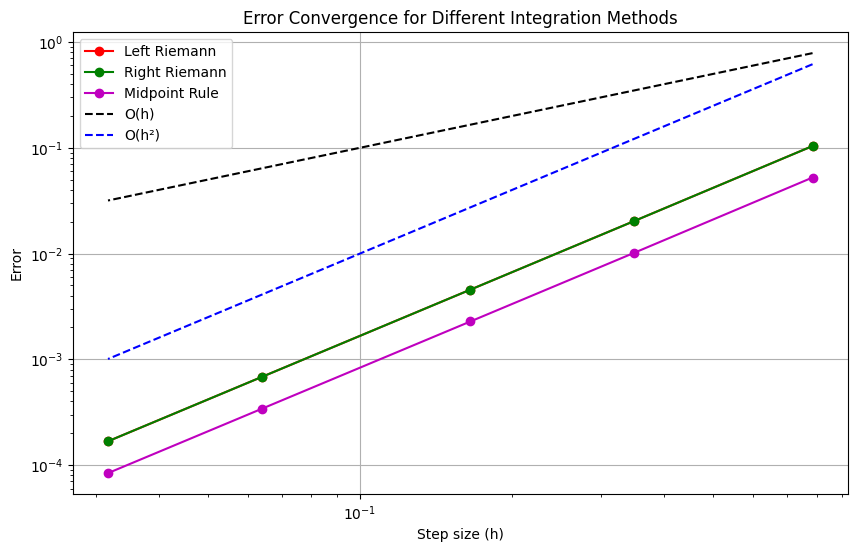

In [5]:
ns = [5, 10, 20, 50, 100]
errors_left = []
errors_right = []
errors_mid = []
for n in ns:
    h = (b - a) / (n - 1)
    x = np.linspace(a, b, n)
    y = f(x)

    I_left = h * sum(y[:n-1])
    errors_left.append(abs(true_value - I_left))

    I_right = h * sum(y[1:])
    errors_right.append(abs(true_value - I_right))

    midpoints = (x[:n-1] + x[1:]) / 2
    y_mid = f(midpoints)
    I_mid = h * sum(y_mid)
    errors_mid.append(abs(true_value - I_mid))

plt.figure(figsize=(10, 6))
step_sizes = [(b - a) / (n - 1) for n in ns]
plt.loglog(step_sizes, errors_left, 'ro-', label='Left Riemann')
plt.loglog(step_sizes, errors_right, 'go-', label='Right Riemann')
plt.loglog(step_sizes, errors_mid, 'mo-', label='Midpoint Rule')
plt.loglog(step_sizes, [h for h in step_sizes], 'k--', label='O(h)')
plt.loglog(step_sizes, [h**2 for h in step_sizes], 'b--', label='O(h²)')
plt.xlabel('Step size (h)')
plt.ylabel('Error')
plt.title('Error Convergence for Different Integration Methods')
plt.legend()
plt.grid(True)

For example, let's use the various methods to approximate ∫π0sin(x)dx with 11 evenly spaced grid points over the whole interval. We will compare this value to the exact value of 2:

In [7]:
a_example = 0
b_example = np.pi
n_example = 11
h_example = (b_example - a_example) / (n_example - 1)
x_example = np.linspace(a_example, b_example, n_example)
f_example = np.sin(x_example)

I_riemannL = h_example * sum(f_example[:n_example-1])
err_riemannL = 2 - I_riemannL

I_riemannR = h_example * sum(f_example[1:])
err_riemannR = 2 - I_riemannR

midpoints_example = (x_example[:n_example-1] + x_example[1:]) / 2
I_mid = h_example * sum(np.sin(midpoints_example))
err_mid = 2 - I_mid

print(f"Left Riemann Sum: {I_riemannL:.10f}, Error: {err_riemannL:.10f}")
print(f"Right Riemann Sum: {I_riemannR:.10f}, Error: {err_riemannR:.10f}")
print(f"Midpoint Rule: {I_mid:.10f}, Error: {err_mid:.10f}")

Left Riemann Sum: 1.9835235375, Error: 0.0164764625
Right Riemann Sum: 1.9835235375, Error: 0.0164764625
Midpoint Rule: 2.0082484079, Error: -0.0082484079


###Trapezoid Rule

The Trapezoid Rule is another method for approximating definite integrals by dividing the area under a curve into trapezoids rather than rectangles.

For each subinterval, the Trapezoid Rule computes the area of a trapezoid with corners at (xi,0), (xi+1,0), (xi,f(xi)), and (xi+1,f(xi+1)), which is h × (f(xi) + f(xi+1))/2. The complete formula is ∫ₐᵇf(x)dx ≈ ∑ᵢ₌₀ⁿ⁻¹ h × (f(xi) + f(xi+1))/2.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

a = 0
b = np.pi
true_value = 2

def basic_trapezoid_rule(f, a, b, n):
    h = (b - a) / (n - 1)
    x = np.linspace(a, b, n)
    y = f(x)
    integral = 0
    for i in range(n-1):
        integral += (h/2) * (y[i] + y[i+1])
    return integral

When we expand, we get ∑ᵢ₌₀ⁿ⁻¹ h × (f(xi) + f(xi+1))/2 = (h/2)[(f(x₀) + f(x₁)) + (f(x₁) + f(x₂)) + ... + (f(xₙ₋₁) + f(xₙ))]. This involves many extra additions and function calls, so a more computationally efficient form is ∫ₐᵇf(x)dx ≈ (h/2)(f(x₀) + 2(∑ᵢ₌₁ⁿ⁻¹f(xi)) + f(xₙ)). This simplification is possible because all intermediate points (x₁ to xₙ₋₁) are counted twice in the original formula.

Lets approximate the same integral as before with 11 evenly space grid points, but with the Trapezoid Rule:

In [14]:
a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_trap = (h/2)*(f[0] + \
          2 * sum(f[1:n-1]) + f[n-1])
err_trap = 2 - I_trap

print(I_trap)
print(err_trap)

1.9835235375094546
0.01647646249054535


The accuracy of the Trapezoid Rule is determined using Taylor series expansion. For a single subinterval, the error is O(h³) and for the whole interval, the error is O(h²).

This means the Trapezoid Rule has the same order of accuracy as the Midpoint Rule, making it more accurate than the Riemann methods.

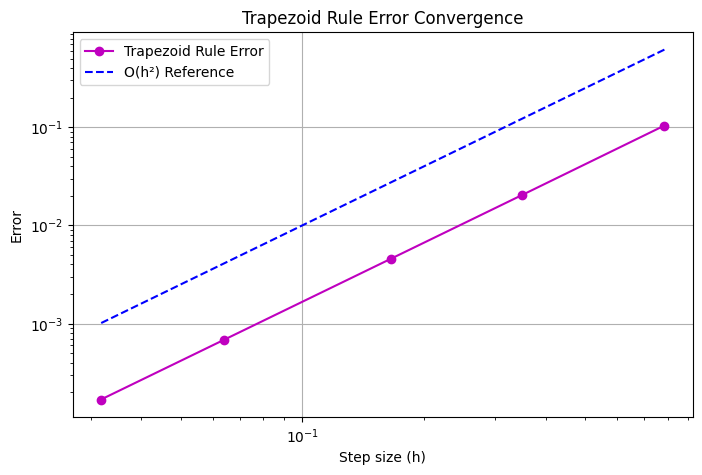

In [10]:
def calculate_errors(method, ns):
    errors = []
    for n in ns:
        approx = method(f, a, b, n)
        errors.append(abs(true_value - approx))
    return errors

ns = [5, 10, 20, 50, 100]
step_sizes = [(b - a) / (n - 1) for n in ns]
trap_errors = calculate_errors(efficient_trapezoid_rule, ns)

plt.figure(figsize=(8, 5))
plt.loglog(step_sizes, trap_errors, 'mo-', label='Trapezoid Rule Error')
plt.loglog(step_sizes, [h**2 for h in step_sizes], 'b--', label='O(h²) Reference')
plt.xlabel('Step size (h)')
plt.ylabel('Error')
plt.title('Trapezoid Rule Error Convergence')
plt.legend()
plt.grid(True)

Let's visualize how it works:

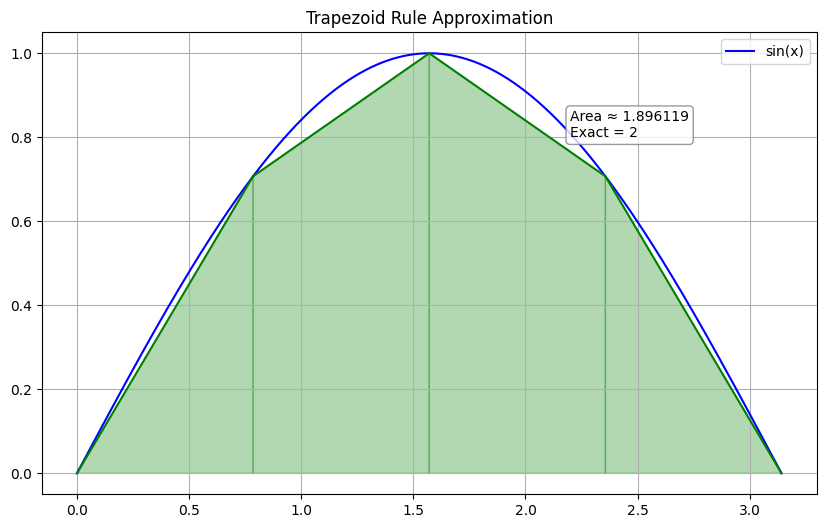

In [11]:
def visualize_trapezoid_rule(f, a, b, n):
    h = (b - a) / (n - 1)
    x = np.linspace(a, b, n)
    y = f(x)
    x_fine = np.linspace(a, b, 1000)
    y_fine = f(x_fine)
    plt.figure(figsize=(10, 6))
    plt.plot(x_fine, y_fine, 'b-', label='sin(x)')

    for i in range(n-1):
        xs = [x[i], x[i], x[i+1], x[i+1]]
        ys = [0, y[i], y[i+1], 0]
        plt.fill(xs, ys, alpha=0.3, color='g')
        plt.plot([x[i], x[i+1]], [y[i], y[i+1]], 'g-')

    plt.title('Trapezoid Rule Approximation')
    plt.grid(True)
    plt.legend()

    I_trap = (h/2) * (y[0] + 2*np.sum(y[1:n-1]) + y[n-1])
    plt.annotate(f'Area ≈ {I_trap:.6f}\nExact = {true_value}',
                 xy=(0.7*np.pi, 0.8),
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

    plt.show()

visualize_trapezoid_rule(f, a, b, 5)

Let's compare the error for each of the methods again:

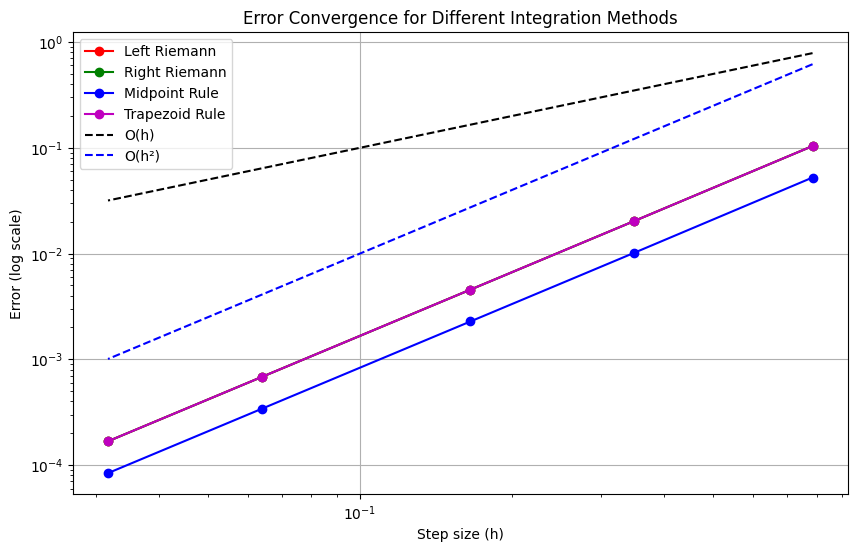

In [12]:
def compare_error_convergence():
    ns = [5, 10, 20, 50, 100]
    errors_left = []
    errors_right = []
    errors_mid = []
    errors_trap = []

    for n in ns:
        h = (b - a) / (n - 1)
        x = np.linspace(a, b, n)
        y = f(x)

        I_left = h * np.sum(y[:n-1])
        errors_left.append(abs(true_value - I_left))
        I_right = h * np.sum(y[1:])
        errors_right.append(abs(true_value - I_right))

        midpoints = (x[:n-1] + x[1:]) / 2
        y_mid = f(midpoints)
        I_mid = h * np.sum(y_mid)
        errors_mid.append(abs(true_value - I_mid))

        I_trap = (h/2) * (y[0] + 2*np.sum(y[1:n-1]) + y[n-1])
        errors_trap.append(abs(true_value - I_trap))

    plt.figure(figsize=(10, 6))
    step_sizes = [(b - a) / (n - 1) for n in ns]

    plt.loglog(step_sizes, errors_left, 'ro-', label='Left Riemann')
    plt.loglog(step_sizes, errors_right, 'go-', label='Right Riemann')
    plt.loglog(step_sizes, errors_mid, 'bo-', label='Midpoint Rule')
    plt.loglog(step_sizes, errors_trap, 'mo-', label='Trapezoid Rule')

    plt.loglog(step_sizes, [h for h in step_sizes], 'k--', label='O(h)')
    plt.loglog(step_sizes, [h**2 for h in step_sizes], 'b--', label='O(h²)')

    plt.xlabel('Step size (h)')
    plt.ylabel('Error (log scale)')
    plt.title('Error Convergence for Different Integration Methods')
    plt.legend()
    plt.grid(True)

    plt.show()

compare_error_convergence()

So the Midpoint and Trapezoid Rules have similar accuracy, but they approximate the curve differently. The Trapezoid Rule uses linear interpolation between points while the Midpoint Rule uses the function value at the midpoint. Both, however, are more accurate than the Riemannn sums.